![Astrofisica Computacional](../logo.PNG)

---
## 32. Ecuaciones Diferenciales Ordinarias 01


Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Resumen

En este cuaderno se presentarán algunos de los métodos para resolver un sistema de ecuaciones diferenciales Ordinarias.

`A. Garcia. Numerical Methods for Physics. (1999). Chapter 3 `

---

## Ecuaciones Diferenciales Ordinarias (ODE)

Un sistema de ecuaciones deiferenciales ordinarias (ODEs) de primer orden es una relación entre una función (vectorial) desconocida $y(x)$ y su derivada $y^\prime(x)$. Un sistema general de  ODEs de primer orden se puede escribir en la forma

\begin{equation}
y^\prime (x) =f(x,y(x))\,.
\end{equation}

Una solución de la ecuación diferencial es una función $y(x)$ que satisface la ODE.

En general, se tienen dos clases de problemas de ODE de primer orden:

1. Problemas de valor inicial : $y(x_i)$ es dado en un punto inicial $x_i$.

2. Problemas de valor de frontera (en dos puntos): $y$ es conicida en dos extremos (fronteras) del dominio y estas **condiciones de frontera** deben satisfacerse simultáneamente.





---
### Reducción a un problema de ODE de primer orden

Cualquier ODE puede reducirse a un problema de primer orden introduciendo variables adicionales.

#### Ejemplo

\begin{equation}
y''(x) + q(x) y'(x) = r(x)\,\,.
\end{equation}

Introduciendo una nueva función $z(x)$, este sistema se puede escribir como un sistema de ODE de primer orden,

\begin{align}
\text{(1)}\,\, y'(x) &= z(x)\\
\text{(2)}\,\, z'(x) &= r(x) - q(x) z(x).
\end{align}


---
## Métodos Explícitos e Implícitos para resolver ODEs

En terminos generales, los métodos para integrar un sistema de ODEs se clasifican en *explícitos* e *implícitos*.

Los métodos explícitos utilizan diferencias para construir y actualizar la solución utilizando los valores actuales y previos de las variables. Algunos ejemplos de métodos explícitos son el método de Euler y los métodos Runge-Kutta.

Los métodos implícitos evaluan el lado derecho de las ecuaciones diferenciales utilizando el nuevo valor de la función que se está buscando.

--- 
## Errores y ODEs

Todos los procedimientos para resolver numéricamente un sistema de ODEs de valor inicial implícan la transformación delas ecuaciioines diferenciales continuas en un proceso iterativo discreto que comienza a partir de una condición incial y retorna los valores de la función $y(x)$ en puntos $x_m = x_0 + m * h$, donde $h$ es el paso de discretización (el cual se asumirá como constante en esta descripción).

Dos clases de error pueden surgir en estos procedimientos: 

1. **Error de redondeo.** Debido a la precicisión limitada de los números de punto flotante. El error de redondeo global es la sumade los errores de punto flotante locales (en cada paso de la iteración).


2. **Error de truncamiento.** 

* Local: El error asociado con cada uno de los pasos cuando se reemplaza la descripción continua (e.g. una derivada) con una descripción discreta (e.g., diferencias finitas).

* Global: Si el error de truncamiento local es $\mathcal{O}(h^{n+1})$, entonces el error de truncamiento global será $\mathcal{O}(h^n)$ porque el número de pasos utilizados para evaluar las derivadas hasta alcanzar un punto arbitrario $x_f$, comenzando desde $x_0$, es $\frac{x_f - x_0}{h}$.

---
---

## Método de Euler

Considere el sigueinte sistema de ODEs,

\begin{equation}
y' = f(x,y)
\end{equation}

con la condición inicial $y(x_0) = y_0$. Introduciremos un tamaño de paso fijo $h$ y se obtendrá un estimado para $y(x)$ en el punto $x_1 = x_0 + h$ utilizando el teorema de Taylor,

\begin{equation}
\begin{aligned}
y(x_1) &= y(x_0+h) = y(x_0) + y'(x_0) h + \mathcal{O}(h^2)\,,\\
       &= y(x_0) + h f(x_0,y(x_0)) +  \mathcal{O}(h^2)\,.
\end{aligned}
\end{equation}


De la misma forma, se obtiene el valor $y_{n+1}$ de la función en el punto $x_{n+1} = x_0 + (n+1) h$ mediante

\begin{equation}
y_{n+1} = y(x_{n+1}) = y_n + h f(x_n,y(x_n)) + \mathcal{O}(h^2)\,.
\end{equation}


Este se conoce como el **método de forward Euler**.

---
El método de Euler es extremadamente simple, pero puede ser impreciso y potencialmente inestable.

El error de este método escala como $\propto h^2$ localmente. Sin embargo, si $L$ es la longitud del dominio, entonces $h = L / N$, donde $N$ es el número de puntos usades para cubrir el dominio. Ya que se están tomando $N$ pasos de integración, el error global será $\propto N h^2 = N L^2 / N^2 = L L/N \propto h$. 

Por lo tanto, el método forward Euler es preciso a primer-orden globalmente.


### Estabilidad

Forward Euler es un método **explícito**. Esto significa que el valor $y_{n+1}$ es dado explícitamente en términos de cantidades conocidas como $y_n$ y $f(x_n,y_n)$.
 
Los métodos explícitos son simples y eficientes pero debe utilizarse un tamaño de paso pequeño para asegurar estabilidad. 


### Ejemplo. Ecuación de Transferencia Radiativa

Consideraremos radiación electromagnética atravesando materia. En general, la intensidad de la radiación no permanecerá constante porque a lo largo de su camino, este puede perder o ganar energía por procesos de absorción o emisión. 

En el caso de un rayo de luz con intensidad $I$ que atraviesa un material con *coeficiente de absorción* $\alpha$, se puede establecer un problema diferencial que representa la perdida de intensidad al viajar una distancia $ds$ así:

\begin{equation}
\frac{dI}{ds} = -\alpha I\,\,, \hspace{1cm}\text{with} \hspace{1cm}  
I(0) = 1\,,\,\, \alpha > 0\,\,.
\end{equation}

Por convención, un valor de $\alpha$ positivo representa que el rayo pierde energía y se considerará que la intensidad original del haz estará normalizada a $1$.


Es claro que la solución exacta de este problema es $I(s) = e^{-\alpha s}$, la cual es estable y suave con $I(0) = 1$ y $I(\infty) = 0$.

Al aplicar el método de forward Euler se tiene

\begin{equation}
I_{n+1} = I_n - \alpha \, h\, I_n = (1-\alpha h) I_{n} 
\end{equation}

\begin{equation}
I_{n+1}  = (1 - \alpha h)^2 I_{n-1} = \cdots = (1 - \alpha h)^{n+1} I_0\,\,.
\end{equation}

Esto implica que, para prevenir cualquier posible amplificación de los errores, se debe asegurar que $|1 - \alpha h|<1$.

En efecto, se pueden identificar tres posibles casos 

| | | |
|:-: | :-: | :--|
| $0 < 1- \alpha h < 1$  | : | $(1- \alpha h)^{n+1}$ decae (muy bueno!) |
|$-1 < 1- \alpha h < 0$ | : | $(1- \alpha h)^{n+1}$ oscila (no tan bueno!)|
|$1- \alpha h < -1$     | : | $(1- \alpha h)^{n+1}$ oscila y diverge (muy malo!)|


Este análisis da un criterio de estabilidad para el método cuando $0< h < \frac{2}{\alpha}$.

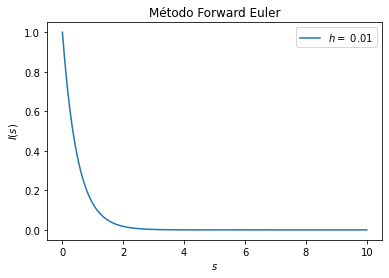

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def ODE(I):
    alpha = 2.  # Apsorption coefficient
    rhs = -alpha*I
    return rhs


def FEuler(h, t0, q0):
    '''
    ------------------------------------------
    FEuler(h, t0, q0)
    ------------------------------------------
    Forward Euler's method for solving a ODEs 
    system.
    Arguments:
    h: stepsize for the iteration
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
    ------------------------------------------
    '''
    f = ODE(q0)
    q1 = q0 + h*f
    return q1


# Creation of the Grid
s_0 = 0.
s_f = 10.
n = 1000
#h = 0.2
h = (s_f - s_0)/n


# Initial value
I_0 = 1.


# Variables setup
s = np.linspace(s_0, s_f, n)
I = np.zeros(n)
I[0] = I_0

# Main Loop
for i in range(1,n):
    I[i] = FEuler(h, s[i-1], I[i-1])

# Plot
fig, ax = plt.subplots()
ax.plot(s, I, label=f'$h=$ {h:.2f}')
ax.set_title('Método Forward Euler')
ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$I(s)$')
plt.legend()
plt.show()

Ahora comprobaremos la estabilidad del método.

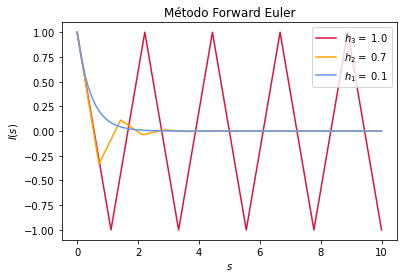

In [2]:

# Initial Condition
I_0 = 1.

# Creation of the grid
s_0 = 0.
s_f = 10.

# Three stepsizes to compare
n1 = 100
h1 = (s_f - s_0)/n1

n2 = 15
h2 = (s_f - s_0)/n2

n3 = 10
h3 = (s_f - s_0)/n3


# Arrays to store the solution
s1 = np.linspace(s_0, s_f, n1)
I1 = np.zeros(n1)
I1[0] = I_0

s2 = np.linspace(s_0, s_f, n2)
I2 = np.zeros(n2)
I2[0] = I_0

s3 = np.linspace(s_0, s_f, n3)
I3 = np.zeros(n3)
I3[0] = I_0

for i in range(1,n1):
    I1[i] = FEuler(h1, s1[i-1], I1[i-1])

for i in range(1,n2):
    I2[i] = FEuler(h2, s2[i-1], I2[i-1])

for i in range(1,n3):
    I3[i] = FEuler(h3, s3[i-1], I3[i-1])

fig, ax = plt.subplots()
ax.plot(s3, I3, color='crimson', label=f'$h_3=$ {h3:.1f}')
ax.plot(s2, I2, color='orange', label=f'$h_2=$ {h2:.1f}')
ax.plot(s1, I1, color='cornflowerblue', label=f'$h_1=$ {h1:.1f}')

ax.set_title('Método Forward Euler')
ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$I(s)$')
plt.legend()
plt.show()

---
## Método Predictor-Corrector

Considere la siguiente modificación del método de Euler, 

\begin{equation}
y_{n+1} = y_{n} + h\, \frac{f(x_n, y_n) + f(x_{n+1},y_{n+1})}{2}\,\,.
\end{equation}

Esta puede dar un mejor estimado debido a que utiliza la *pendiente promedio* de $y$. 

Sin embargo, cabe notar que en este paso aún no se conoce $y_{n+1}$. Para evitar este inconveniente, se puede utilizar el método usual de forward Euler para estimar incialmente el valor de $y_{n+1}$ y luego, utilizar este valor en la modificación presentada arriba. De esta forma, el método completo tendría la estructura

\begin{equation}
\begin{aligned}
y_{n+1}^{(\mathrm{P})} &= y_n + h f(x_n,y_n)\,\,, & \text{(predictor)}\\
y_{n+1} &= y_n + \frac{h}{2} \left[f(x_n,y_n) + f(x_{n+1}, y^{(\mathrm{P})}_{n+1}) \right]\,\,. & \text{(corrector)}
\end{aligned}
\end{equation}

Es posible mostrar que el error del **método predictor-corrector**  es localmente de $h^3$ y globalmente de $h^2$.  Esto quiere decir que este método es preciso a segundo orden, mientras que Euler es preciso a primer orden. 

---
---

## Métodos  Runge-Kutta 

La idea detrás de los métodos Runge-Kutta (RK) es ajustar la expansión en serie de Taylor de $y(x)$ en $x=x_n$ hasta el orden más alto posible.


---
### RK2. Método RK de segundo orden

Para el sistema

\begin{equation}
\frac{dy}{dx} = f(x,y)\,\,,
\end{equation}

se considerará la iteración 

\begin{equation}
y_{n+1} = y_n + a k_1 + b k_2\,\,,
\end{equation}

donde

\begin{align}
k_1 &= h\,f(x_n,y_n)\,\,,\nonumber\\
k_2 &= h\,f(x_n+\alpha h,y_n + \beta k_1)\,\,.
\end{align}

Los cuatro parámetros desconocidos $a,b,\alpha,\beta$ se fijan de tal forma que la ecuación para $y_{n+1}$ concuerde con la expansión en serie de Taylor de $y' = f(x,y)$:

\begin{align}
y_{n+1} &= y_n + h y_n' + \frac{h^2}{2} y_n'' + \mathcal{O}(h^3)\,\,,\nonumber\\
&= y_n + h f(x_n,y_n) + \frac{h^2}{2} \frac{d}{dx} f(x_n,y_n) + \mathcal{O}(h^3)\,\,,\nonumber\\
&= y_n + h f_n + h^2 \frac{1}{2}\left( \frac{\partial f_n}{\partial x} + \frac{\partial f_n}{\partial y} f_n \right) + \mathcal{O}(h^3)\,\,,
\end{align}

donde $f_n = f(x_n,y_n)$. Al considerar la suposición hecha arriba,

\begin{equation}
y_{n+1} = y_n + a h f_n + b h f(x_n + \alpha h, y_n + \beta h f_n)\,\,.
\label{eq:rk2c}
\end{equation}

Al expandir el último término en serie de Taylor a primer orden $(x_n,y_n)$, se tiene

\begin{equation}
y_{n+1} = y_n + a h f_n + bh\left[ f_n + \frac{\partial f}{\partial x}(x_n,y_n) \alpha h + 
\frac{\partial f}{\partial y}(x_n,y_n) \beta h f_n \right]\,\,.
\end{equation}

Una comparaión directa de los resultados permite identificar las constantes 

\begin{equation}
a+b = 1\,\,,\hspace{2em} \alpha b = \frac{1}{2}\,\,\hspace{2em} \beta b = \frac{1}{2}\,\,.
\end{equation}


Sin embargo, se nota que solo se tienen 3 ecuaciones para determianr 4 parámetros. Esto quiere decir que tomando un valor arbitrario para uno de ellos, se fijan los restantes. Una elección típica es

\begin{equation}
\alpha = \beta = \frac{1}{2}\,\,,\hspace{2em} a=0\,\,, \hspace{2em} b = 1\,\,.
\end{equation}

Con esto se obtienen las ecuaciones del método RK2:

\begin{align}
k_1 & = h f(x_n,y_n)\,\,,\\
k_2 & = h f(x_n + \frac{1}{2}h, y_n + \frac{1}{2}k_1)\,\,,\\
y_{n+1} & = y_n + k_2 + \mathcal{O}(h^3)\,\,.
\end{align}

Este método es localmente  $\mathcal{O}(h^3)$ y globalmente $\mathcal{O}(h^2)$.

**Nota:** Utilizando $a=b=1/2$ y $\alpha=\beta=1$, se recupera el método predictor-corrector!


---

### RK3

\begin{align}
k_1 &=h f(x_n,y_n)\,\,\nonumber\\
k_2 &= h f(x_n + \frac{h}{2},y_n + \frac{1}{2} k_1)\,\,,\nonumber\\
k_3 &= h f(x_n + h, y_n - k_1 + 2 k_2)\,\,,\nonumber\\
y_{n+1} &= y_n + \frac{1}{6}(k_1 + 4 k_2 + k_3) + \mathcal{O}(h^4)\,\,.
\end{align}


--- 

### RK4

\begin{align}
k_1 &=h f(x_n,y_n)\,\,,\\
k_2 &=h f(x_n + \frac{h}{2},y_n + \frac{1}{2}k_1)\,\,,\nonumber\\
k_3 &=h f(x_n + \frac{h}{2},y_n + \frac{1}{2}k_2)\,\,,\nonumber\\
k_4 &=h f(x_n+h,y_n + k_3)\,\,,\nonumber\\
y_{n+1} &= y_n + \frac{1}{6}(k_1 + 2 k_2 + 2 k_3 + k_4) + \mathcal{O}(h^5)\,\,.
\end{align}

---

### Ejemplo. Ecuación de Transferencia Radiativa

Considere de nuevo ODE de transferencia radiativa con un coeficiente de absorción.

\begin{equation}
\frac{dI}{ds} = -\alpha I\,\,, \hspace{1cm}\text{with} \hspace{1cm}  
I(0) = 1\,,\,\, \alpha > 0.
\end{equation}


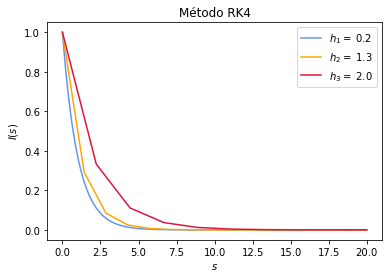

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from RK4 import *

def ODE(s, I, alpha=1.):
    rhs = -alpha*I
    return rhs


# Initial Condition
I_0 = 1.


# Creation of the grid
s_0 = 0.
s_f = 20.

# Two stepsizes to compare
n1 = 100
h1 = (s_f - s_0)/n1

n2 = 15
h2 = (s_f - s_0)/n2

n3 = 10
h3 = (s_f - s_0)/n3

# Arrays to store the solution
s1 = np.linspace(s_0, s_f, n1)
I1 = np.zeros(n1)
I1[0] = I_0

s2 = np.linspace(s_0, s_f, n2)
I2 = np.zeros(n2)
I2[0] = I_0

s3 = np.linspace(s_0, s_f, n3)
I3 = np.zeros(n3)
I3[0] = I_0

for i in range(1,n1):
    I1[i] = RK4(ODE, h1, 0, I1[i-1])

for i in range(1,n2):
    I2[i] = RK4(ODE, h2, 0, I2[i-1])

for i in range(1,n3):
    I3[i] = RK4(ODE, h3, 0, I3[i-1])

fig, ax = plt.subplots()
ax.plot(s1, I1, color='cornflowerblue', label=f'$h_1=$ {h1:.1f}')
ax.plot(s2, I2, color='orange', label=f'$h_2=$ {h2:.1f}')
ax.plot(s3, I3, color='crimson', label=f'$h_3=$ {h3:.1f}')

ax.set_title('Método RK4')
ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$I(s)$')
plt.legend()
plt.show()


## Métodos Runge-Kutta con paso adaptativo

Los métodos RK descritos arriba requieren la elección de un paso fijo $h$ pero, como se debe escoger su valor?

U-na opción interesante es ecoger un valor de **tolerancia al error** y dejar que el valor de $h$ sea elegido automáticamente para que el método cumpla con esta tolerancia. 

Esto implica que se necesita

1. Un método para estimar el error.
2. Una forma de ajustar el tamaño del paso $h$ si el error es muy grande (o muy pequeño).

---
### Formula RK con estimación de errores

Ahora presentaremos un esquema para el RK de orden 3/4 (Bogaki and Shampine)

\begin{equation}
\begin{aligned}
k_1 &= h f(x_n, y_n)\,\,,\\
k_2 &= h f(x_n + \frac{1}{2} h, y_n + \frac{1}{2} k_1)\,\,,\\
k_3 &= h f(x_n + \frac{3}{4} h, y_n + \frac{3}{4} k_2)\,\,,\\
y_{n+1} &= y_n + \frac{2}{9} k_1 + \frac{1}{3} k_2 + \frac{4}{9} k_3 + \mathcal{O}(h^4)\,\,\\
k_4 &= h f(x_n + h, y_{n+1})\,\,\\
y^*_{n+1} &= y_n + \frac{7}{24} k_1 + \frac{1}{4}k_2 + \frac{1}{3}k_3 + \frac{1}{8} k_4 + \mathcal{O}(h^3)\,\,.
\end{aligned}
\end{equation}

El error está medido por la cantidad 

\begin{equation}
\delta y_{n+1} = y_{n+1} - y^*_{n+1}\,\,.
\end{equation}


En este esquema, la función $k_4$ del paso $n$ es igual a la función $k_1$ del paso $n+1$. Por lo tanto, no es necesario evaluar de nuevo $k_1$ en el paso $n+1$; simplemente se reserva el valor calculado de $k_4$ y se re-utiliza en el siguiente paso. Este truco se denomina **FSAL (First Same As Last)**.


Dado el error estimado $\delta y_{n+1} = y_{n+1} - y^*_{n+1}$, se exige que permanezca más pequeño que el valor de tolerancia, $|\delta y_{n+1}| \le
\epsilon$ ajustando el valor de $h$.


Usualmente se utiliza 

\begin{equation}
\epsilon = \epsilon_a + |y_{n+1}|\epsilon_r 
\end{equation}

donde

$\epsilon_a$ : tolerancia del error absoluto

$\epsilon_r$ : tolerancia del error relativo

### Ajuste del paso $h$

Se define 

\begin{equation}
\Delta = \frac{|\delta y_{n+1}|}{\epsilon}\,\,,
\end{equation}

y se requiere que  $\Delta \approx 1$.

Si se tiene un algoritmo con, $\Delta \sim \mathcal{O}(h^p)$, es posible ajusta el valor de $\Delta$ modificando  el paso $h$. En efecto al cambiar el tamaño del paso a 

\begin{equation}
h_\text{desired} = h \left|\frac{\Delta_\text{desired}}{\Delta} \right| ^\frac{1}{p}\,\,,
\end{equation}

se obtendrá un valor de $\Delta_\text{desired} = 1$.

---

De esta forma, una forma general del algoritmo para ajustar $h$ es el siguiente:

1. Considere un paso $h$ y calcule el valor de $\Delta$.
2. Si $\Delta > 1$ (error muy grande), entonces

  - defina $h_\text{new} = h \left| \frac{1}{\Delta} \right|^{\frac{1}{p}} S$, donde $S$ es un factor de suavizado ($\sim$ $0.9$ aproximadamente).
  
  - **Descarte** la iteración anterior y repitala con $h_\mathrm{new}$.
  
3. Si $\Delta < 1$ (error muy), entonces

  - defina $h_\text{new} = h \left| \frac{1}{\Delta} \right|^{\frac{1}{p}} S$.
  
  - **Acepte** la iteración anteriorold y realice la siguiente iteración con $h_\text{new}$.

